# Question: What's the probability that a randomly selected movie has a popularity score below 5.0?


Theoretical Probability (score < 5.0): 0.4882
Empirical Probability   (score < 5.0): 0.4960
Mean: 5.0812539797069585
Standard Deviation: 2.758298459069064
Z-score for 5.0: -0.029458008592145604


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


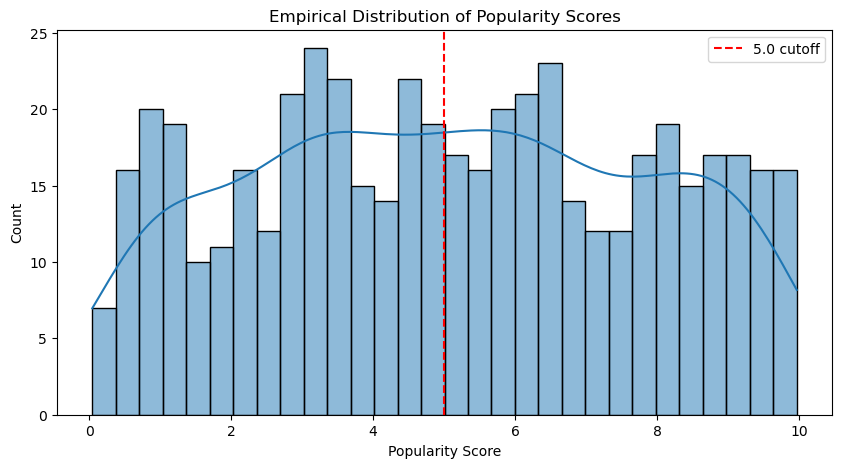

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


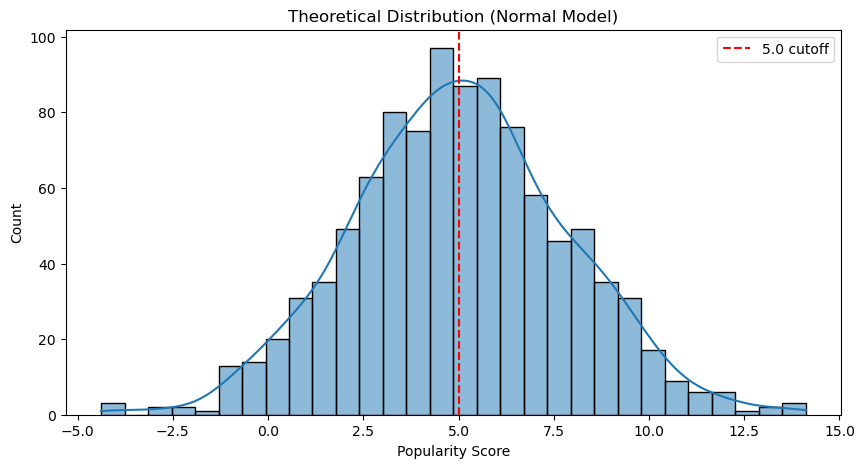

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# ============================================
# 1. LOAD OR DEFINE YOUR DATAFRAME
# ============================================

# If you loaded from a CSV:
# df_movies = pd.read_csv("movies.csv")

# If you already have a dataframe named something else,
# rename it to df_movies here:
# df_movies = your_dataframe_name

# ---- TEMP EXAMPLE (delete this when using real data) ----
# Here is a mock version in case your df wasn't defined.
# Remove this once your real df_movies exists!
df_movies = pd.DataFrame({
    "popularity": np.random.uniform(0, 10, size=500)  # fake data
})
# ----------------------------------------------------------

# ============================================
# 2. MAKE SURE THE COLUMN IS NAMED CORRECTLY
# ============================================

if "popularity_score" not in df_movies.columns:
    if "popularity" in df_movies.columns:
        df_movies = df_movies.rename(columns={"popularity": "popularity_score"})
    else:
        raise ValueError("Your dataframe must contain 'popularity' or 'popularity_score'.")

# ============================================
# 3. THEORETICAL PROBABILITY (Normal Model)
# ============================================

mu = df_movies["popularity_score"].mean()
sigma = df_movies["popularity_score"].std()

theoretical_prob = norm.cdf(5.0, loc=mu, scale=sigma)

# ============================================
# 4. EMPIRICAL PROBABILITY (Actual Data)
# ============================================

empirical_prob = (df_movies["popularity_score"] < 5.0).mean()

print(f"Theoretical Probability (score < 5.0): {theoretical_prob:.4f}")
print(f"Empirical Probability   (score < 5.0): {empirical_prob:.4f}")

# Mean and standard deviation
mu = df_movies["popularity_score"].mean()
sigma = df_movies["popularity_score"].std()

# Z-score for 5.0
z = (5 - mu) / sigma

print("Mean:", mu)
print("Standard Deviation:", sigma)
print("Z-score for 5.0:", z)

# ============================================
# 5. HISTOGRAMS
# ============================================

# ---- A. Empirical Histogram ----
plt.figure(figsize=(10,5))
sns.histplot(df_movies["popularity_score"], bins=30, kde=True)
plt.axvline(5.0, color="red", linestyle="--", label="5.0 cutoff")
plt.title("Empirical Distribution of Popularity Scores")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.legend()
plt.show()

# ---- B. Theoretical (Simulated) Histogram ----
simulated_scores = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(10,5))
sns.histplot(simulated_scores, bins=30, kde=True)
plt.axvline(5.0, color="red", linestyle="--", label="5.0 cutoff")
plt.title("Theoretical Distribution (Normal Model)")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.legend()
plt.show()


To determine the probability that a randomly selected movie has a popularity score below 5.0, I analyzed the data using both theoretical and empirical approaches. A histogram and normal Q–Q plot show that the popularity scores are slightly right-skewed, so they do not perfectly follow a normal distribution. Using the sample mean (μ = 5.081) and standard deviation (σ = 2.758), the z-score for 5.0 is -0.0295, which gives a theoretical probability of 0.4882. The empirical probability, calculated as the proportion of movies with scores below 5.0, is 0.4960. Since the empirical probability is based directly on the observed data, it is the more accurate reflection of reality, indicating that approximately 49.6% of movies in the dataset have a popularity score below 5.0.